In [250]:
# Importation des bibliothèques nécessaires
import pandas as pd  # Pour la manipulation des données sous forme de DataFrame
import seaborn as sns  # Pour la visualisation de données avec des graphiques
import matplotlib.pyplot as plt  # Pour les graphiques personnalisés
from sklearn.cluster import KMeans  # Pour l'algorithme de clustering KMeans
import numpy as np  # Pour les opérations mathématiques et la gestion de tableaux
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.metrics import silhouette_score  # Pour évaluer la qualité des clusters générés
from sklearn.preprocessing import StandardScaler



# Présentation du jeu de données
Le jeu de données Superstore Marketing Campaign est axé sur l'analyse du comportement d'achat des clients dans un magasin en ligne. Il contient des informations relatives aux achats des clients, y compris les produits achetés, les montants des achats, ainsi que des données démographiques sur les clients. Ce jeu de données est souvent utilisé pour des analyses de segmentation et de prédiction de la réponse des clients à des campagnes de marketing, ce qui permet d'explorer des tendances dans les habitudes d'achat.

Il est particulièrement utile pour effectuer des analyses sur la manière dont différentes variables (comme les dépenses dans certaines catégories de produits) influencent la réponse des clients aux actions marketing, et pour identifier des segments de clients ayant des comportements similaires. Le jeu de données inclut des informations qui facilitent la mise en œuvre de modèles d'analyse, comme les K-means ou les tests statistiques pour la segmentation et l'évaluation des performances des campagnes​


# Chargement des données

In [174]:
df = pd.read_csv('data/superstore_data.csv')

In [6]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


# Nettoyage des données

In [178]:
# Vérification du nombre de valeurs manquantes dans chaque colonne du DataFrame
df.isnull().sum()  # Cette méthode retourne la somme des valeurs manquantes pour chaque colonne du DataFrame 'df'


Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [180]:
# Calcul du pourcentage de valeurs manquantes dans la colonne 'Income'
print(df['Income'].isnull().sum() / len(df)*100)  # Affiche le pourcentage de valeurs manquantes dans la colonne 'Income' du DataFrame 'df'

1.0714285714285714


Il nous manque le revenu annuel de 1.07% des clients, ce qui représente 24 clients sur un total de 2240. Cela pourrait ne pas avoir un impact majeur sur l'analyse, mais l'imputation de ces valeurs manquantes permet de garantir que l'ensemble des données est complet et prêt pour une analyse précise

## Imputation des valeurs manquantes dans la colonne 'Income' avec la médiane

#### Remplacement des valeurs manquantes dans la colonne 'Income' par la médiane de cette colonne

In [189]:

df['Income'] = df['Income'].fillna(df['Income'].median())  # Utilise la médiane de la colonne 'Income' pour remplir les valeurs manquantes


### Verification du nombre total de valeurs manquantes dans le DataFrame

In [19]:
df.isnull().sum().sum()  # Retourne le nombre total de valeurs nulles dans toutes les colonnes


0

In [21]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


## Visualisation des données 

#### Visualiser la distribution de 'Income'

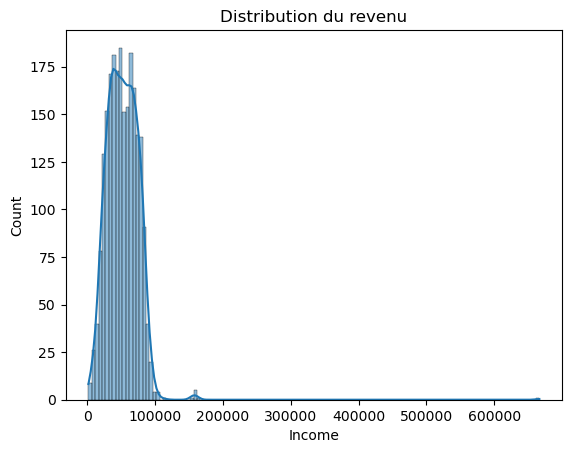

In [26]:
sns.histplot(df['Income'], kde=True)
plt.title('Distribution du revenu')
plt.show()

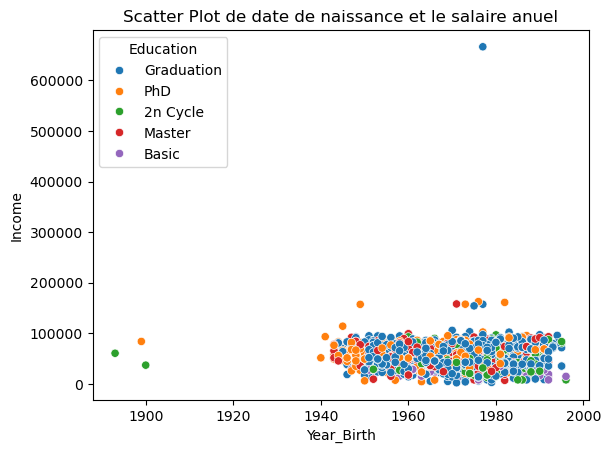

In [194]:
sns.scatterplot(x='Year_Birth', y='Income',hue='Education', data=df)
plt.title('Scatter Plot de date de naissance et le salaire anuel')
plt.show()

In [198]:
# Filtrer les personnes nées avant 1920
df_filtered = df[df['Year_Birth'] >= 1920]
# Filtrer les personnes ayant un revenu supérieur à 60 000
df_filtered = df_filtered[df_filtered['Income'] <= 60000]


# Visualisation aprés le nettoyage

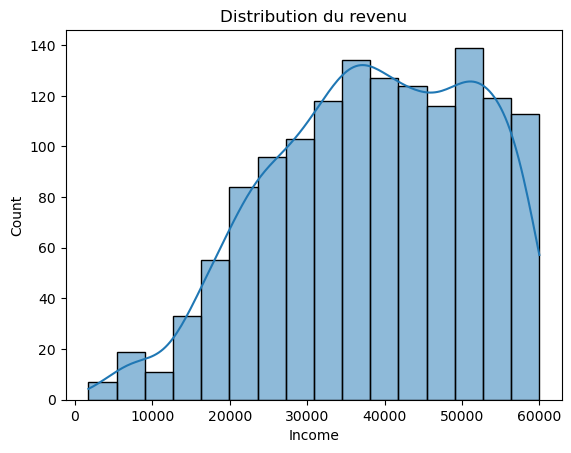

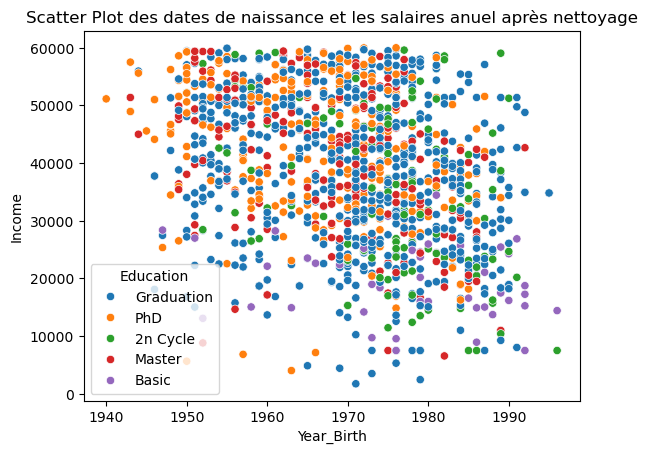

In [201]:
# Visualiser la distribution de 'Income'
sns.histplot(df_filtered['Income'], kde=True)
plt.title('Distribution du revenu')
plt.show()
# Re-dessiner le scatter plot après nettoyage
sns.scatterplot(x='Year_Birth', y='Income', hue='Education', data=df_filtered)
plt.title('Scatter Plot des dates de naissance et les salaires anuel après nettoyage')
plt.show()


## Analysons la correlation entre les colonnes

In [204]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df_filtered.select_dtypes(include=['number'])

In [206]:
# Calculer la matrice de corrélation
corr_matrix = df_numeric.corr()

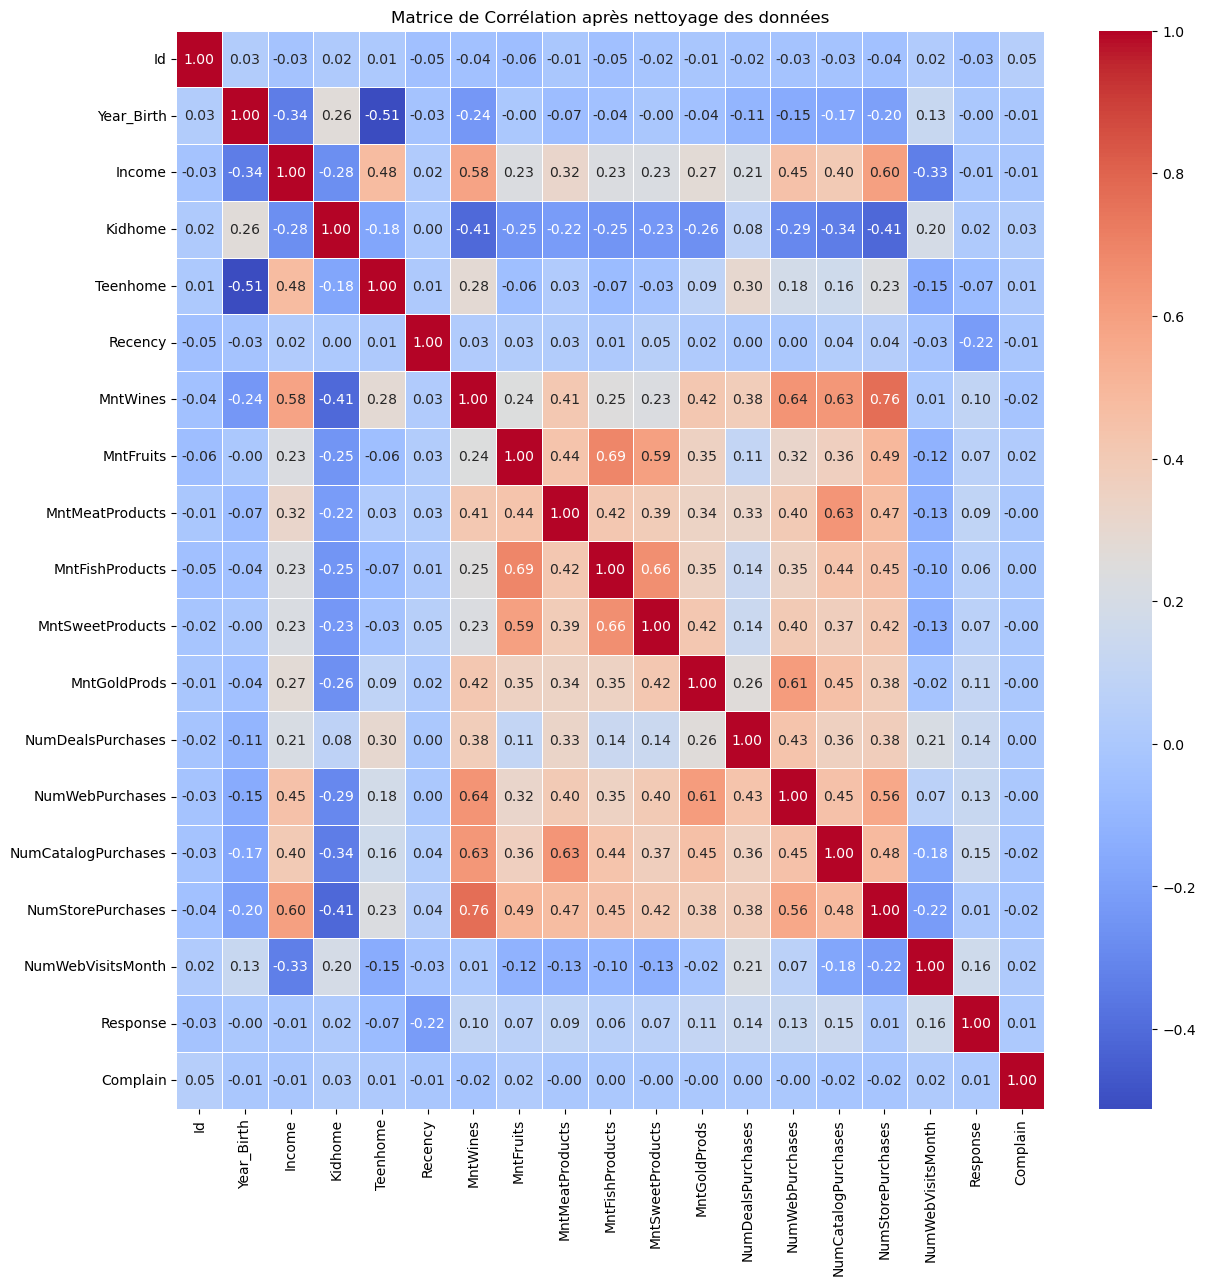

In [208]:
# Visualiser la matrice de corrélation
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation après nettoyage des données')
plt.show()


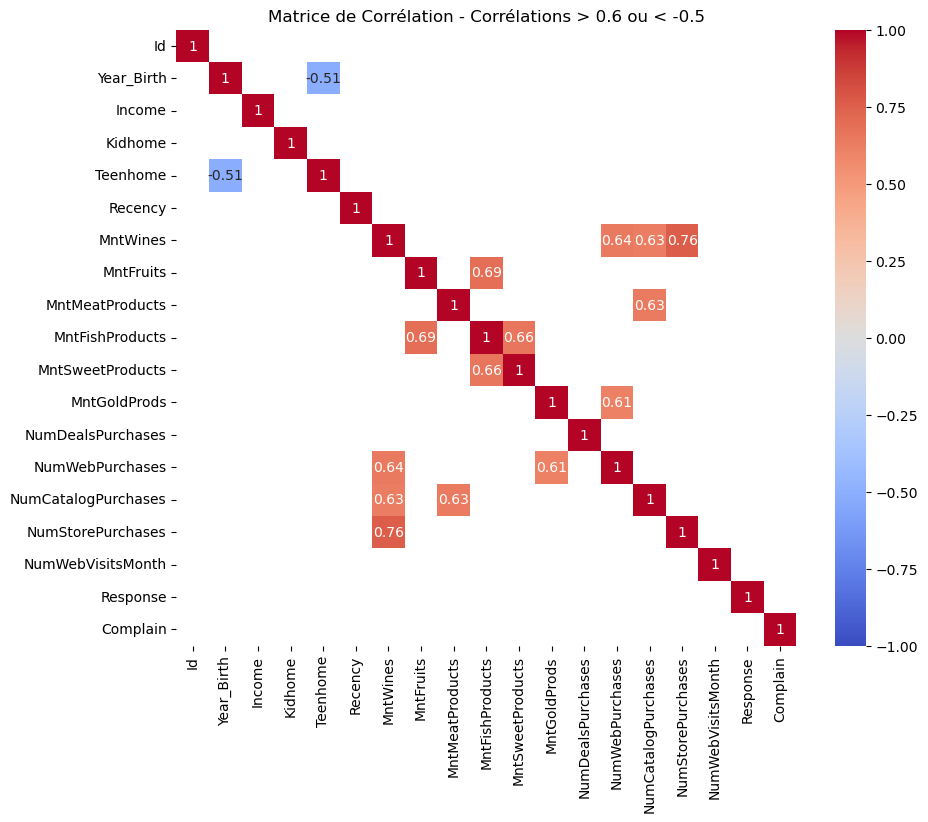

In [210]:
# Filtrer les corrélations supérieures à 0.5 en valeur absolue
high_corr = corr_matrix[(corr_matrix > 0.6) | (corr_matrix < -0.5)]

# Visualiser la matrice de corrélation filtrée
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation - Corrélations > 0.6 ou < -0.5')
plt.show()


### Cela permet de segmenter la clientèle selon leurs préférences d'achat : 

In [212]:
# Segmentation basée sur MntWines et NumStorePurchases
df_filtered['Acheteurs_Vins_Store'] = (df_filtered['MntWines'] > df_filtered['MntWines'].median()) & (df_filtered['NumStorePurchases'] > df_filtered['NumStorePurchases'].median())

# Segmentation basée sur MntFishProducts et MntFruits
df_filtered['Acheteurs_Sains'] = (df_filtered['MntFishProducts'] > df_filtered['MntFishProducts'].median()) & (df_filtered['MntFruits'] > df_filtered['MntFruits'].median())

# Segmentation basée sur MntMeatProducts et NumCatalogPurchases
df_filtered['Acheteurs_Viande_Catalogue'] = (df_filtered['MntMeatProducts'] > df_filtered['MntMeatProducts'].median()) & (df_filtered['NumCatalogPurchases'] > df_filtered['NumCatalogPurchases'].median())

# Affichage de la segmentation
print(df_filtered[['Acheteurs_Vins_Store', 'Acheteurs_Sains', 'Acheteurs_Viande_Catalogue']].head())


    Acheteurs_Vins_Store  Acheteurs_Sains  Acheteurs_Viande_Catalogue
1                   True             True                        True
3                  False            False                       False
4                  False             True                       False
7                  False            False                       False
13                 False            False                       False


# 3. Apprentissage automatique

## Modèle non supervisé

### Segmentation des clients avec KMeans sur les achats et produits

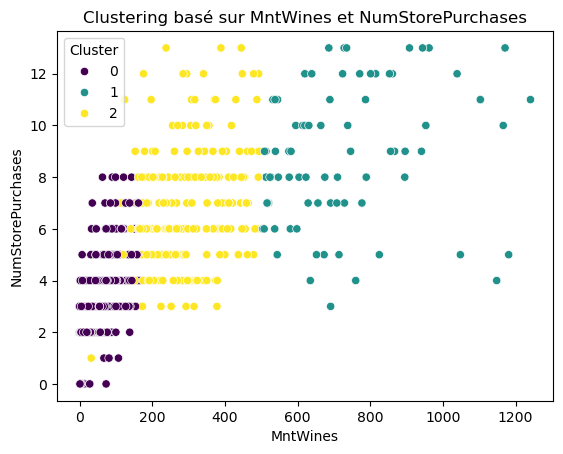

Centres des clusters :
[[3.54253215e+01 3.18298714e+00 8.68447082e+00 5.79821958e+00
  2.31592483e+01 5.33135509e-01]
 [7.30416667e+02 8.79761905e+00 2.46309524e+01 1.74047619e+01
  1.36940476e+02 4.07142857e+00]
 [2.77924092e+02 6.58415842e+00 2.89702970e+01 1.90759076e+01
  1.20079208e+02 2.58745875e+00]]


In [214]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Limite à 1 thread
# Sélection des variables corrélées pour la segmentation
features_corr = ['MntWines', 'NumStorePurchases', 'MntFishProducts', 'MntFruits', 'MntMeatProducts', 'NumCatalogPurchases']

# Extraire les données des variables corrélées
X = df_filtered[features_corr].dropna()

# Appliquer KMeans pour créer 3 groupes (clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(X)

# Visualiser les clusters
sns.scatterplot(x='MntWines', y='NumStorePurchases', hue='Cluster', palette='viridis', data=df_filtered)
plt.title('Clustering basé sur MntWines et NumStorePurchases')
plt.show()

# Afficher les centres des clusters
print("Centres des clusters :")
print(kmeans.cluster_centers_)

In [216]:
# Ajouter les labels de clusters à df_filtered
df_filtered['Cluster'] = kmeans.labels_


In [218]:
df_filtered

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Acheteurs_Vins_Store,Acheteurs_Sains,Acheteurs_Viande_Catalogue,Cluster
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,3,7,5,1,0,True,True,True,2
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,1,0,2,7,0,0,False,False,False,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,3,1,2,7,1,0,False,True,False,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,2,1,3,5,0,0,False,False,False,0
13,2964,1981,Graduation,Married,26872.0,0,0,10/16/2013,0,3,...,1,1,2,6,0,0,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,1,0,3,8,0,0,False,True,False,0
2231,8595,1973,Graduation,Widow,42429.0,0,1,11/2/2014,99,55,...,1,1,3,5,0,0,False,False,False,0
2232,7232,1973,Graduation,Widow,42429.0,0,1,11/2/2014,99,55,...,1,1,3,5,0,0,False,False,False,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,1,0,3,8,0,0,False,False,False,0


In [220]:
# Distribution des clients par cluster
cluster_distribution = df_filtered['Cluster'].value_counts()
cluster_distribution


Cluster
0    1011
2     303
1      84
Name: count, dtype: int64

In [222]:
# Statistiques descriptives par cluster
cluster_stats = df_filtered.groupby('Cluster').describe()
cluster_stats


Id                                                          \
          count         mean          std   min     25%     50%     75%   
Cluster                                                                   
0        1011.0  5623.112760  3240.878386   9.0  2814.5  5517.0  8392.0   
1          84.0  4990.404762  3111.546035  55.0  2342.5  4967.5  7108.0   
2         303.0  5494.508251  3402.273473   1.0  2579.5  5389.0  8403.5   

                 Year_Birth               ... Response      Complain  \
             max      count         mean  ...      75%  max    count   
Cluster                                   ...                          
0        11191.0     1011.0  1971.507418  ...      0.0  1.0   1011.0   
1        10872.0       84.0  1964.130952  ...      0.0  1.0     84.0   
2        11171.0      303.0  1966.561056  ...      0.0  1.0    303.0   

                                                      
             mean       std  min  25%  50%  75%  max  
Cluster                                               
0        0.010880  0.103791  0.0  0.0  0.0  0.0  1.0  
1        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2        0.013201  0.114325  0.0  0.0  0.0  0.0  1.0  

[3 rows x 152 columns]

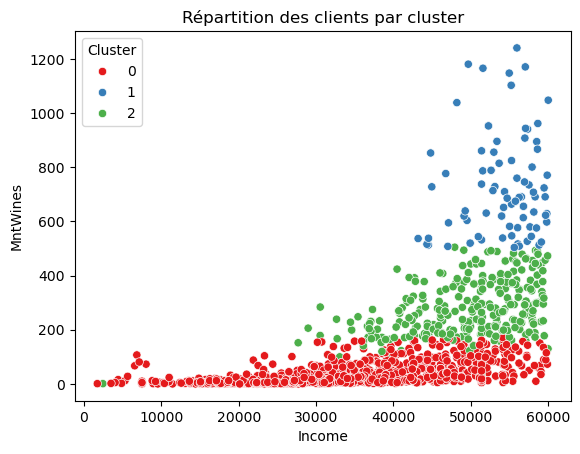

In [268]:
# Scatter plot avec clusters
sns.scatterplot(x='Income', y='MntWines', hue='Cluster', data=df_filtered, palette='Set1')
plt.title('Répartition des clients par cluster')
plt.show()


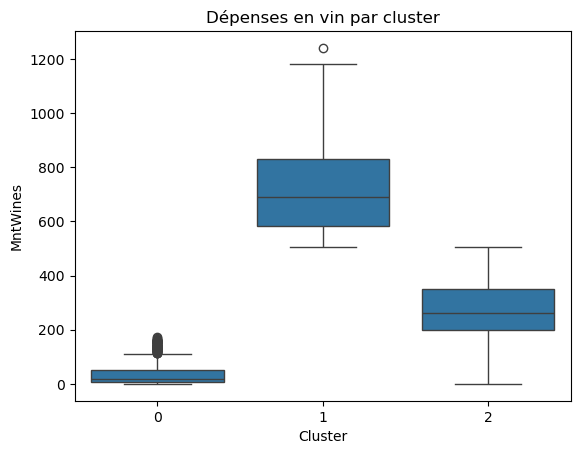

In [62]:
# Visualiser la répartition des dépenses en vin par cluster
sns.boxplot(x='Cluster', y='MntWines', data=df_filtered)
plt.title('Dépenses en vin par cluster')
plt.show()


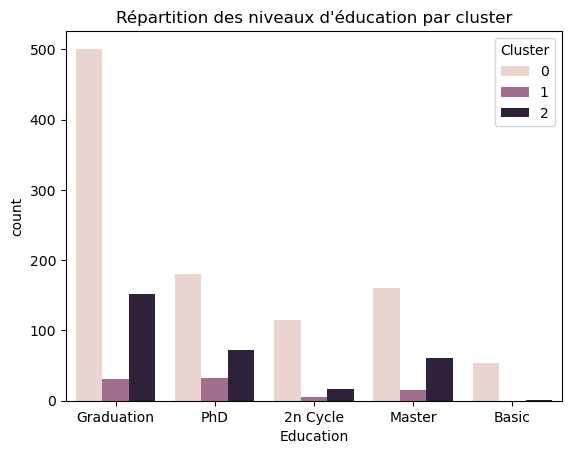

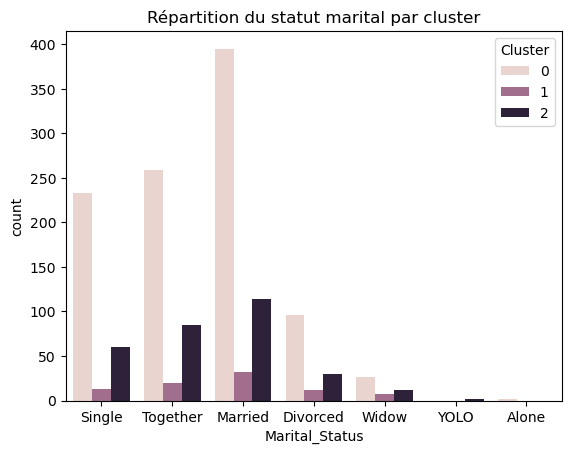

In [272]:
# Visualiser la répartition des niveaux d'éducation par cluster
sns.countplot(x='Education', hue='Cluster', data=df_filtered)
plt.title('Répartition des niveaux d\'éducation par cluster')
plt.show()

# Visualiser la répartition du statut marital par cluster
sns.countplot(x='Marital_Status', hue='Cluster', data=df_filtered)
plt.title('Répartition du statut marital par cluster')
plt.show()


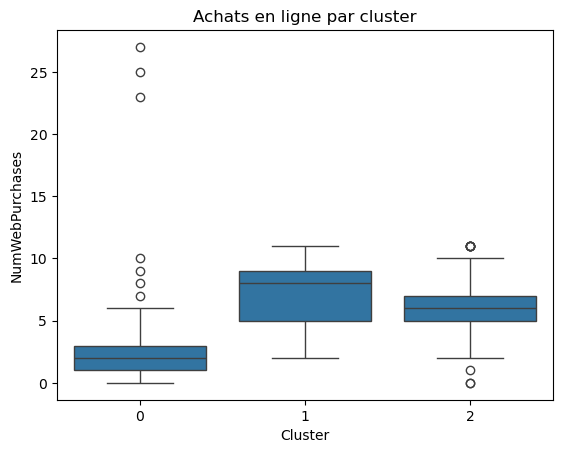

In [64]:
# Visualiser la répartition des achats en ligne par cluster
sns.boxplot(x='Cluster', y='NumWebPurchases', data=df_filtered)
plt.title('Achats en ligne par cluster')
plt.show()


In [66]:
print(df_filtered[['Cluster']].head())  # Affiche les premières lignes de la colonne 'Cluster'


    Cluster
1         2
3         0
4         0
7         0
13        0


In [68]:
df_filtered

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Acheteurs_Vins_Store,Acheteurs_Sains,Acheteurs_Viande_Catalogue,Cluster
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,3,7,5,1,0,True,True,True,2
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,1,0,2,7,0,0,False,False,False,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,3,1,2,7,1,0,False,True,False,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,2,1,3,5,0,0,False,False,False,0
13,2964,1981,Graduation,Married,26872.0,0,0,10/16/2013,0,3,...,1,1,2,6,0,0,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,1,0,3,8,0,0,False,True,False,0
2231,8595,1973,Graduation,Widow,42429.0,0,1,11/2/2014,99,55,...,1,1,3,5,0,0,False,False,False,0
2232,7232,1973,Graduation,Widow,42429.0,0,1,11/2/2014,99,55,...,1,1,3,5,0,0,False,False,False,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,1,0,3,8,0,0,False,False,False,0


In [224]:
columns_to_display = ['Income', 'Year_Birth', 'Response', 'Complain', 'MntWines', 'MntMeatProducts', 'MntFishProducts']

# Ajouter 'Cluster' à la liste des colonnes à afficher
columns_to_display.append('Cluster')

# Calculer les statistiques descriptives par cluster pour les colonnes sélectionnées
cluster_summary = df_filtered[columns_to_display].groupby('Cluster').describe()

# Afficher les résultats
cluster_summary


Income                                                         \
          count          mean           std      min      25%      50%   
Cluster                                                                  
0        1011.0  33967.961919  11788.636827   1730.0  25476.0  34213.0   
1          84.0  54156.970238   4279.059094  43185.0  51556.5  55231.0   
2         303.0  49500.696370   7565.162541   2447.0  44576.5  50664.0   

                           Year_Birth               ... MntMeatProducts  \
              75%      max      count         mean  ...             75%   
Cluster                                             ...                   
0        42386.00  59892.0     1011.0  1971.507418  ...            27.0   
1        57299.25  60000.0       84.0  1964.130952  ...           165.0   
2        55475.50  59973.0      303.0  1966.561056  ...           144.0   

                MntFishProducts                                              \
            max           count       mean        std  min  25%   50%   75%   
Cluster                                                                       
0         226.0          1011.0   8.684471  16.844670  0.0  1.0   3.0  10.0   
1         546.0            84.0  24.630952  35.335153  0.0  0.0  12.0  32.0   
2        1725.0           303.0  28.970297  40.371238  0.0  4.0  12.0  39.0   

                
           max  
Cluster         
0        179.0  
1        172.0  
2        259.0  

[3 rows x 56 columns]

### Diviser en train/test

In [227]:
X_train, X_test = train_test_split(df_filtered[columns_to_display].drop('Cluster', axis=1), test_size=0.2, random_state=42)


In [229]:
# Réentraîner le modèle uniquement sur les données d'entraînement
kmeans.fit(X_train)

# Prédire les clusters sur les données de test
pred_clusters_test = kmeans.predict(X_test)


In [231]:
# Calculer le score silhouette
silhouette_train = silhouette_score(X_train, kmeans.labels_)
silhouette_test = silhouette_score(X_test, pred_clusters_test)

print("Silhouette Score (train):", silhouette_train)
print("Silhouette Score (test):", silhouette_test)

Silhouette Score (train): 0.5780638138524569
Silhouette Score (test): 0.565352295366446


## Amelioration du modèle

## Tester différents nombres de clusters (k)

In [233]:
import os
os.environ["OMP_NUM_THREADS"] = "5"


In [235]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


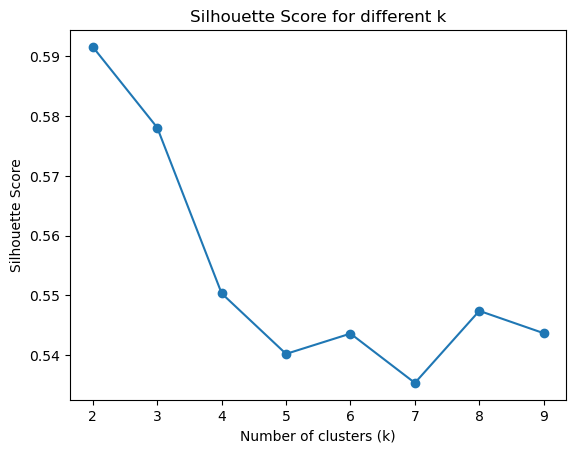

In [237]:
kmeans = KMeans(n_clusters = 1, n_init = 10)
scores = []
range_k = range(2, 10)  # Tester pour k entre 2 et 9

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    scores.append(score)

# Afficher les résultats

plt.plot(range_k, scores, marker='o')
plt.title('Silhouette Score for different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


### Le meilleur résultat est obtenu pour k = 2, ce qui suggère que les données sont mieux segmentées en deux groupes distincts. Ce nombre de clusters maximise le score de silhouette, indiquant une meilleure séparation et cohésion des clusters.

In [240]:
# Appliquer K-Means avec le k optimal
optimal_k = range_k[scores.index(max(scores))]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)

# Ajouter les labels des clusters au dataset (si besoin)
X_train['Cluster'] = kmeans.labels_


In [242]:
cluster_summary = X_train.groupby('Cluster').mean()
cluster_summary


,Income,Year_Birth,Response,Complain,MntWines,MntMeatProducts,MntFishProducts
Cluster,,,,,,,
0,48741.520000,1966.978333,0.108333,0.013333,217.513333,77.041667,19.838333
1,26634.889961,1973.339768,0.108108,0.009653,27.005792,25.326255,8.610039


### Le modèle K-Means a été appliqué avec le nombre optimal de clusters déterminé par le score de silhouette (k = 2). Les labels des clusters ont été ajoutés au jeu de données pour permettre l'analyse et la segmentation des données en fonction de ces clusters.

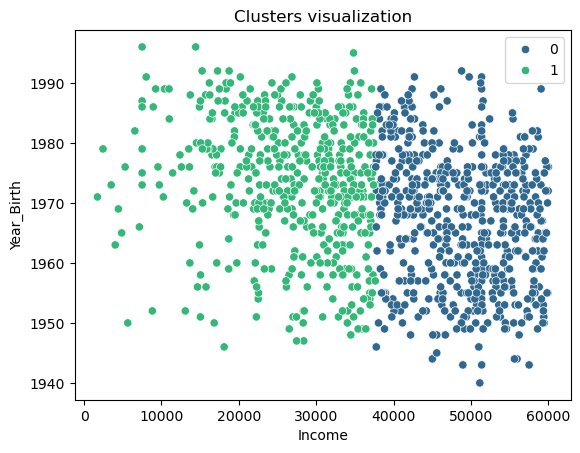

In [247]:
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('Clusters visualization')
plt.show()


In [123]:
# Prédire les clusters sur le jeu de test
test_labels = kmeans.predict(X_test)
test_silhouette_score = silhouette_score(X_test, test_labels)
print("Silhouette Score on test data:", test_silhouette_score)


Silhouette Score on test data: 0.5827762754918431


#### Le score de silhouette sur les données de test est de 0.58, il montre une certaine amélioration par rapport à un score plus faible, ce score indique que la séparation des clusters n'est pas optimale

## Modèle supervisé

## Essayons un modèle supervisé avec un arbre de décision

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Prétraiter les colonnes catégorielles
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

# Sélectionner les colonnes pertinentes
X = df[['Year_Birth', 'Income', 'Kidhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
y = df['Response']  # colonne cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer et entraîner le modèle
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8154761904761905


### L'accuracy du modèle de l'arbre de décision sur le jeu de test est de 81,55%. Cela indique que le modèle fait un bon travail pour prédire la cible, mais il peut encore y avoir des opportunités pour améliorer cette performance..


## Recherche des meilleurs hyperparamètres avec GridSearchCV

In [277]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Définir les paramètres pour GridSearch
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialiser le modèle
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV pour la recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")

# Utiliser le meilleur modèle
best_model = grid_search.best_estimator_

# Évaluer le modèle
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy sur le jeu de test : {accuracy}")


Meilleurs paramètres : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy sur le jeu de test : 0.8318452380952381


Avec ces paramètres, l'accuracy sur le jeu de test est de 83,18%. Cela signifie que le modèle a une bonne performance avec ces hyperparamètres optimaux.

### Évaluation d'un arbre de décision optimisé avec GridSearchCV

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Exemple de données
df_filtered = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'Response']] # Sélectionner les colonnes
X = df_filtered.drop('Response', axis=1)
y = df_filtered['Response']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paramètres pour la recherche par grille
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV pour trouver les meilleurs paramètres
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")

# Faire des prédictions sur l'ensemble de test
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur le jeu de test : {accuracy}")


Meilleurs paramètres : {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy sur le jeu de test : 0.8504464285714286


### L'accuracy obtenue sur le jeu de test est de 0.8504, ce qui indique que le modèle optimisé fonctionne bien sur les données de test. Cela montre une amélioration par rapport à l'accuracy précédente, suggérant que l'optimisation des hyperparamètres a eu un impact positif sur les performances du modèle.

# 4. Tests d'hypothèses

## Test Khi-deux

In [307]:
import pandas as pd
from scipy.stats import chi2_contingency

# Exemple de données
contingency_table = pd.crosstab(df['Marital_Status'], df['Response'])

# Test Khi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print(f"Statistique Khi-deux: {chi2}")
print(f"p-value: {p}")
print(f"Degrés de liberté: {dof}")
print(f"Tableau des fréquences attendues: \n{expected}")

# Interprétation du p-value
if p < 0.05:
    print("Il y a une association significative entre le statut marital et la réponse.")
else:
    print("Il n'y a pas d'association significative entre le statut marital et la réponse.")


Statistique Khi-deux: 54.241636705551365
p-value: 2.1067470540906996e-09
Degrés de liberté: 7
Tableau des fréquences attendues: 
[[1.70178571e+00 2.98214286e-01]
 [2.55267857e+00 4.47321429e-01]
 [1.97407143e+02 3.45928571e+01]
 [7.35171429e+02 1.28828571e+02]
 [4.08428571e+02 7.15714286e+01]
 [4.93517857e+02 8.64821429e+01]
 [6.55187500e+01 1.14812500e+01]
 [1.70178571e+00 2.98214286e-01]]
Il y a une association significative entre le statut marital et la réponse.


## Test Anova

In [310]:
from scipy import stats

# Exemple : faire un test ANOVA entre les groupes de la colonne 'Response' pour la variable 'MntWines'
grouped_data = [df_filtered[df_filtered['Response'] == value]['MntWines'] for value in df_filtered['Response'].unique()]

# Effectuer le test ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

# Afficher les résultats
print(f"Statistique F: {f_stat}")
print(f"p-value: {p_value}")

# Interprétation
if p_value < 0.05:
    print("Il y a une différence significative entre les groupes.")
else:
    print("Il n'y a pas de différence significative entre les groupes.")


Statistique F: 145.7287500228422
p-value: 1.4925307948438506e-32
Il y a une différence significative entre les groupes.


### Le test ANOVA a montré une statistique F de 145.73 et une p-value extrêmement faible (1.49e-32), ce qui indique qu'il y a une différence significative entre les groupes de la variable Response pour la variable MntWines. Cela suggère que les moyennes des différents groupes de Response sont statistiquement différentes en ce qui concerne les montants dépensés en vins.

# Conclusion :
Cette étude a permis de segmenter les clients en fonction de leur comportement d'achat en utilisant des algorithmes de clustering tels que K-Means. Les résultats ont montré une segmentation significative basée sur des critères tels que les achats de vins, les fruits, et la viande, ainsi que la fréquence des achats en magasin et dans les catalogues. Des tests statistiques, comme le test de Khi-deux et le test ANOVA, ont révélé des associations importantes entre ces variables et la réponse des clients.

# Perspectives :
Des améliorations pourraient inclure l'exploration d'autres algorithmes de clustering, comme DBSCAN, ou l'incorporation de données supplémentaires pour améliorer la précision de la segmentation. L'évaluation continue des clusters sur de nouvelles données serait également bénéfique pour valider la stabilité et l'efficacité des segments sur le long terme.